<a href="https://colab.research.google.com/github/GoncNeto/Data-Science/blob/master/Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importar Libraries**

In [0]:
import pandas as pd
import io
from google.colab import files
from sklearn import tree
from sklearn import datasets, linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

**Importar Dataset - Movies**

In [10]:
uploaded = files.upload()

#Load da database
movies_db = pd.read_csv(io.StringIO(uploaded['movie_metadata.csv'].decode('utf-8')))

Saving movie_metadata.csv to movie_metadata (1).csv


**Importar Dataset - Production Company**

In [11]:
uploaded = files.upload()

#Load da database
production = pd.read_csv(io.StringIO(uploaded['imdb_company.csv'].decode('utf-8')))

Saving imdb_company.csv to imdb_company (2).csv


**Merge dataframes:**

In [0]:
movies_db= movies_db.merge(production, on="movie_title", left_index=True, right_index=True)

**Tratamento de dados**

>**One Hot Encoding**

In [0]:
#eliminar as features, depois de ser feito o one hot encoding
movies_db = pd.concat([movies_db,pd.get_dummies(movies_db['director_name'],prefix='')],axis=1).drop(['director_name'],axis=1)
movies_db = pd.concat([movies_db,pd.get_dummies(movies_db['actor_2_name'],prefix='')],axis=1).drop(['actor_2_name'],axis=1)
movies_db = pd.concat([movies_db,pd.get_dummies(movies_db['color'],prefix='')],axis=1).drop(['color'],axis=1)
movies_db = pd.concat([movies_db,pd.get_dummies(movies_db['genres'],prefix='')],axis=1).drop(['genres'],axis=1)
movies_db = pd.concat([movies_db,pd.get_dummies(movies_db['country'],prefix='')],axis=1).drop(['country'],axis=1)

>**Label Encoding**

In [0]:
# Converter coluna para categoria
movies_db["actor_1_name"] = movies_db["actor_1_name"].astype('category')
movies_db["movie_title"] = movies_db["movie_title"].astype('category')
movies_db["actor_3_name"] = movies_db["actor_3_name"].astype('category')
movies_db["plot_keywords"] = movies_db["plot_keywords"].astype('category')
movies_db["language"] = movies_db["language"].astype('category')
movies_db["movie_imdb_link"] = movies_db["movie_imdb_link"].astype('category')
movies_db["content_rating"] = movies_db["content_rating"].astype('category')
movies_db["production"] = movies_db["production"].astype('category')

# Atribuir a variável codificada a nova coluna
movies_db["actor_1_name"] = movies_db["actor_1_name"].cat.codes
movies_db["movie_title"] = movies_db["movie_title"].cat.codes
movies_db["actor_3_name"] = movies_db["actor_3_name"].cat.codes
movies_db["plot_keywords"] = movies_db["plot_keywords"].cat.codes
movies_db["language"] = movies_db["language"].cat.codes
movies_db["movie_imdb_link"] = movies_db["movie_imdb_link"].cat.codes
movies_db["content_rating"] = movies_db["content_rating"].cat.codes
movies_db["production"] = movies_db["production"].cat.codes

In [0]:
movies_db.dtypes

>**Preencher NaNs - Mean**

In [15]:
columns = ['actor_1_name', 'movie_title', 'actor_3_name', 'language', 'content_rating', 'budget', 'imdb_score','num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','facenumber_in_poster','num_user_for_reviews','title_year','actor_2_facebook_likes','aspect_ratio','production']

from sklearn.preprocessing import Imputer
train= movies_db[columns]


imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(train)
train= imp.transform(train)

movies_db[columns] = train

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


>Verificar se existe algum NaN:

In [0]:
movies_db.isnull().sum() 

**Classificação do dataset**

>**Split training set/test set**

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

#Usar gross
target= movies_db['gross']
X = movies_db.drop('gross', axis = 1)
[features_train, features_test, classes_train, classes_test] = model_selection.train_test_split(X, target, test_size=0.20, random_state = 100) 

model = tree.DecisionTreeRegressor()
model.fit(features_train, classes_train)

score_train = model.score(features_train, classes_train) 
score_test = model.score(features_test, classes_test)

print("Decision Tree")
print("score_train:", score_train)
print("score_test:", score_test)
print("\n")

Decision Tree
score_train: 1.0
score_test: 0.32391334962012563




>**Curva de Aprendizagem**

In [0]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
np.random.seed(0)

#Usar gross
target= np.array(movies_db['gross'])
movies_db = movies_db.drop('gross', axis = 1)
feature_list = list(movies_db.columns)
movies_dbb = np.array(movies_db)

In [17]:
# Load libraries

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor

train_sizes = [1, 100, 500]


# Create CV training and test scores for various training set sizes
train_sizes, score_train, score_test = learning_curve(estimator = LinearRegression(), 
                                                        X = movies_dbb, 
                                                        y = target,
                                                        train_sizes = train_sizes,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring = 'neg_median_absolute_error')

# Create CV training and test scores for various training set sizes
train_sizes2, score_train2, score_test2 = learning_curve(estimator = RandomForestRegressor(), 
                                                        X = movies_dbb, 
                                                        y = target,
                                                        train_sizes = train_sizes,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring = 'neg_median_absolute_error')

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

In [0]:
score_train_mean = -score_train.mean(axis = 1)
score_test_mean = -score_test.mean(axis = 1)

score_train_mean2 = -score_train2.mean(axis = 1)
score_test_mean2 = -score_test2.mean(axis = 1)

>LinearRegression:

(0, 1000000000)

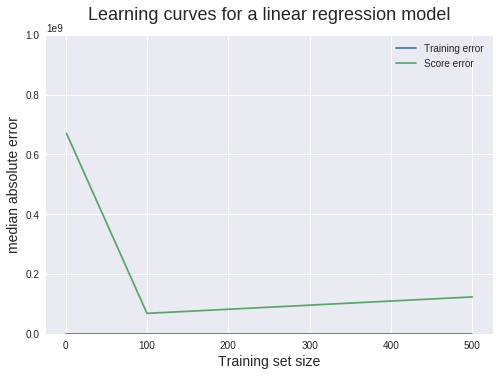

In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_sizes, score_train_mean, label = 'Training error')
plt.plot(train_sizes, score_test_mean, label = 'Score error')

plt.ylabel('median absolute error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1000000000)

>RandomForestRegressor:

(0, 100000000)

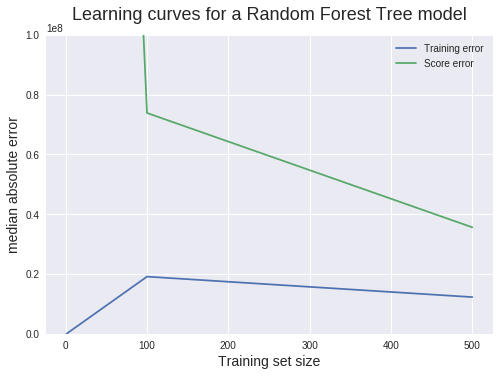

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_sizes2, score_train_mean2, label = 'Training error')
plt.plot(train_sizes2, score_test_mean2, label = 'Score error')

plt.ylabel('median absolute error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Random Forest Tree model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,100000000)

**Random Forest**

In [21]:
train_features, test_features, train_labels, test_labels = train_test_split(movies_dbb, target, test_size = 0.20, random_state = 50)

display('Training Features Shape:'+ str(train_features.shape))
display('Training Labels Shape:'+ str(train_labels.shape))
display('Testing Features Shape:'+ str(test_features.shape))
display('Testing Labels Shape:'+ str(test_labels.shape))

'Training Features Shape:(4034, 6434)'

'Training Labels Shape:(4034,)'

'Testing Features Shape:(1009, 6434)'

'Testing Labels Shape:(1009,)'

In [0]:
# Instantiate model with 1000 decision trees

rf = RandomForestRegressor(n_estimators = 1000, random_state = 50)
rf.fit(train_features, train_labels);


In [23]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)

display('Erro medio: '+str(round((np.mean(errors)), 2))+'€')

'Erro medio: 21662872.75€'

In [24]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
display('Accuracy: '+ str(round(accuracy, 2))+ '%.')

'Accuracy: -19615.22%.'

In [26]:
from sklearn.metrics import mean_squared_error
display("RMSE: "+ str(np.sqrt(mean_squared_error(predictions, test_labels))))

'RMSE: 35752441.7729447'

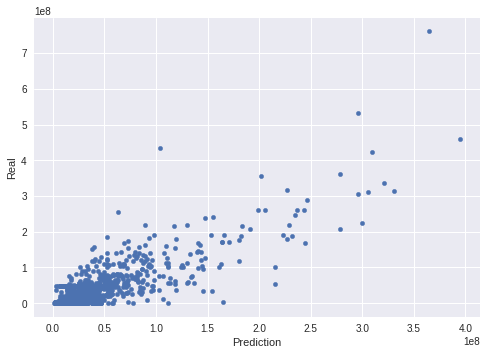

In [27]:
Values = pd.DataFrame({'Prediction':predictions, 'Real':test_labels})
Values = Values.sort_values(['Prediction'], ascending=[True])
Values.plot('Prediction', 'Real', kind='scatter')

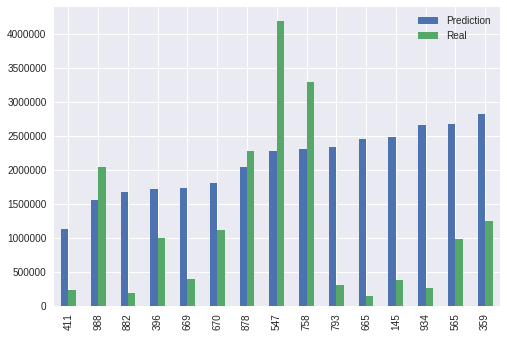

In [28]:
Values.cumsum()
Values.iloc[:15].plot(kind='bar');

In [29]:
regr = linear_model.LinearRegression()

regr.fit(test_features, test_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
predict = regr.predict(test_features)

# Erros absolutos
errorss = abs(predict - test_labels)

display('Erro medio: '+str(round(np.mean(errors), 2))+'€')

'Erro medio: 21662872.75€'

In [31]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errorss / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
display('Accuracy: '+ str(round(accuracy, 2))+ '%.')

'Accuracy: 99.94%.'

In [32]:
display("RMSE: "+ str(np.sqrt(mean_squared_error(predict, test_labels))))


'RMSE: 276.598868049422'

Text(0.5, 1.0, 'Real Gross vs Predicted Gross')

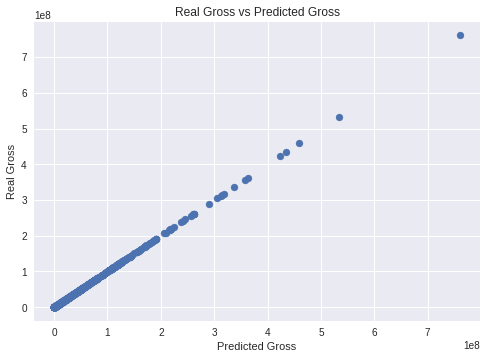

In [33]:
plt.scatter(test_labels, predict)
plt.xlabel("Predicted Gross")
plt.ylabel("Real Gross")
plt.title("Real Gross vs Predicted Gross")